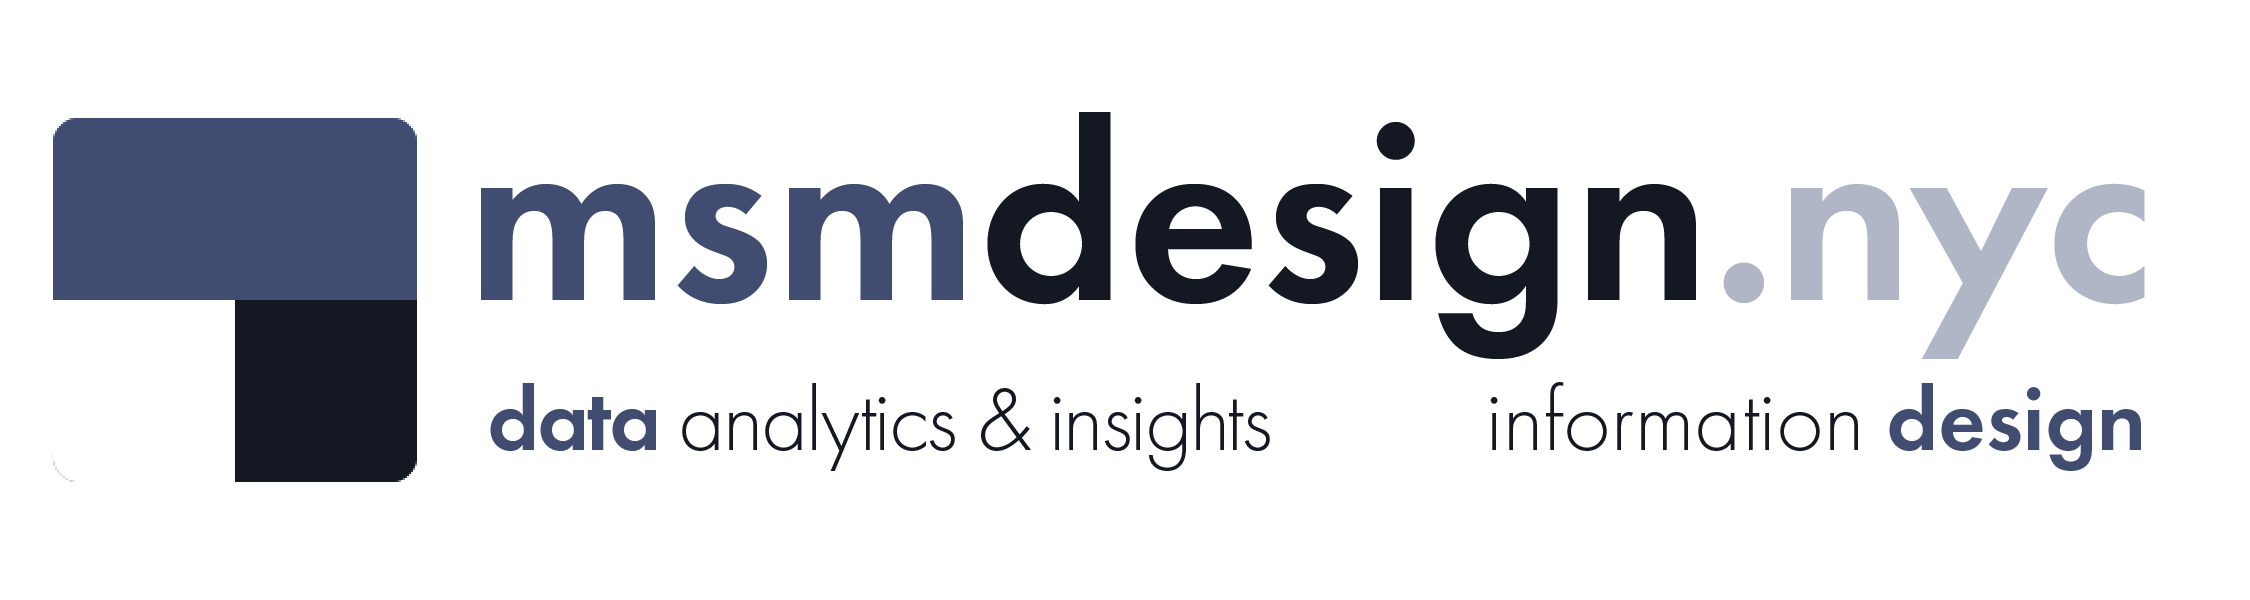

---
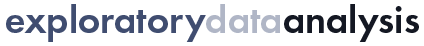

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.

---

# Donations Received by City Agencies

**Dataset Analyzed:** *Donations Received by City Agencies*

**About This Dataset:** Each City agency is required by rule of the Conflicts of Interest Board to disclose all donations of $5,000 or greater. This dataset lists donations reported by City agencies for calendar year 2020. Data provided by Conflicts of Interest Board (COIB), the City of New York: https://data.cityofnewyork.us/City-Government/Donations-Received-by-City-Agencies/aqs7-v55z



**Acknowledgements:** NYC Open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** INS-008


**EDA Publication Date:** Sunday, January 8, 2023


**Language:** Python


**Libraries Used:** NumPy, pandas, matplotlib, seaborn


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

---

## **0. Prepare the workspace**

### 0.1 Import Python libraries, packages and functions

In [1]:
# import libraries for data wrangling, aggregate functions and basic descriptive statistics
import numpy as np
import pandas as pd

# import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Adjust display options to make plots easier to read and understand

In [2]:
# specify seaborn styling options
sns.set_theme(
    context='talk', 
    style='whitegrid', 
    palette='viridis',
    font='Courier New', 
    font_scale=1.15)    

# allow plots to display inline within the notebook
%matplotlib inline

### 0.3 Set Markdown tables to align-left within notebook cells

In [3]:
%%html
<style>
table {float:left}
</style>

### 0.4 Display all rows of output by default

In [4]:
pd.set_option('display.max_rows', None)

# to reset:
# pd.reset_option('display.max_rows')

### 0.5 Format large numbers and display floating point values to two decimal places

In [5]:
pd.set_option('display.float_format',  '{:,.2f}'.format)

# to reset:
# pd.reset_option('display.float_format')

### 0.6 Load the raw data file into the notebook and visually confirm that it has been read in as expected

In [31]:
# load the data from a csv file (stored locally) into a new DataFrame object

csv = r"F:\Creative Cloud Files\MSM Client 001 - Mister Shepherd Media LLC\MSM Design\github_msm_design\exploratory-data-analysis\insights-made-fresh-daily\nyc-open-data\ins-008\data\Donations_Received_by_City_Agencies.csv"

donations = pd.read_csv(csv, encoding='utf-8')

In [7]:
# glimpse the first three rows

donations.head(3)

,Agency Name,Name of Donor (Individual or Firm),Type of Donation,Value of Donation
0,Actuary (Office of),No donations to report,NaN,NaN
1,Administration for Children's Services,ACS Toy Drive,In-Kind,"$ 6,629.00"
2,Administration for Children's Services,American Christmas,In-Kind,"$ 6,000.00"


In [8]:
# glimpse the last three rows

donations.tail(3)

,Agency Name,Name of Donor (Individual or Firm),Type of Donation,Value of Donation
1469,Water Board,No donations to report,NaN,NaN
1470,Youth and Community Development (Department of),US Soccer Foundation,In - Kind,"181, 000 (7/1/2019-6/30/2020)"
1471,Youth and Community Development (Department of),US Soccer Foundation,In - Kind,"153,300 (7/1/2019-6/30-2020)"


In [32]:
# glimpse ten randomly selected rows

donations.sample(10, random_state=42)

,Agency Name,Name of Donor (Individual or Firm),Type of Donation,Value of Donation
852,Education (Department of),PTA Public School 452 ; 03M452 PTA Public Sch...,Money,"$ 20,000.00"
184,Citywide Administrative Services (Department of),Natixis Manhattan,N95 Respirators /Mask,"$ 54,860.00"
1261,Health and Hospitals Corporation,NYU School of Medicine,In-Kind,"$ 13,365.00"
67,Borough President - Manhattan,New York Public Library,In-Kind; Waiver of Rent,NaN
220,Citywide Administrative Services (Department of),Tatcha,3 ply mask,"$ 391,140.00"
494,Education (Department of),Diana Davis Spencer Fdtn ; PS 146M - OTPS/Per ...,Money,"$ 317,200.00"
430,Education (Department of),Bank of America ; CTE Summer Scholars ; Fund f...,Money,"$ 9,134.00"
240,Comptroller,No donations to report,NaN,NaN
218,Citywide Administrative Services (Department of),Taiwan,Non-Surgical Disposable Masks,"$ 633,000.00"
49,Borough President - Brooklyn,Made in Brooklyn,In-Kind,"$ 950,000.00"


**The data has been loaded and has been read in as expected.**

### 0.7. Check the data type of each column

In [33]:
# display a listing of each of the DataFrame's columns and its data type

donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Agency Name                         1472 non-null   object
 1   Name of Donor (Individual or Firm)  1472 non-null   object
 2   Type of Donation                    1419 non-null   object
 3   Value of Donation                   1416 non-null   object
dtypes: object(4)
memory usage: 46.1+ KB


**The 'Agency Name' and 'Type of Donation', and 'Value of Donation' columns have been read in as *object* data type. We'll need to change the data types of these columns to a something more appropriate.**

### 0.8 Refer to the [data dictionary](https://opendata.cityofnewyork.us/) and make sure that our DataFrame's data types match the source data. Reassign data types where needed.

In [34]:
# cast column(s) containing numeric values to numeric data type
# remove whitespace from 'Value of Donation' column
# remove the dollar sign so the 'Value of Donation' column can be read as numeric (float)
donations['Value of Donation'] = donations['Value of Donation'].str.replace(' ', '').replace("[$,]", "", regex=True).astype(float, errors='ignore')

In [35]:
# replace invalid data in the 'Value of Donation' column with NaN
donations['Value of Donation'] = pd.to_numeric(donations['Value of Donation'], errors='coerce')

In [36]:
# confirm that the changes have taken effect as expected
donations.sample(20, random_state=1)

,Agency Name,Name of Donor (Individual or Firm),Type of Donation,Value of Donation
481,Education (Department of),D27-D29 Magnet Grant new U165A160013 ; MAGNET ...,Money,"45,900,000.00"
1384,Parks and Recreation (Department of),Cabot Creamery,Money and In-Kind Services,"15,585.00"
309,Education (Department of),02M281 616 First Avenue LLC ; PRIVATE GRANT 5...,Money,"30,000.00"
421,Education (Department of),After School Program at 20K185 ; SELF SUSTAINI...,Money,"117,720.00"
980,Education (Department of),various ; NYC Mentoring program ; Fund for Pub...,Money,"162,964.00"
1203,Health and Hospitals Corporation,Drew Figdor,Money,"9,700.00"
299,Education (Department of),02M183 PS 183 PTA (Teaching Assistant/Per Diem...,Money,"289,746.00"
258,District Attorney - New York Co,No donations to report,NaN,NaN
1063,Health and Hospitals Corporation,Foundation for Long Term Care/MCHF Subgrantee,Money,"12,000.00"
1188,Health and Hospitals Corporation,William Stokvis,Money,"5,000.00"


In [37]:
# cast column(s) containing categorical varibles to categorical data type

donations['Agency Name']      = donations['Agency Name'].astype('category')
donations['Type of Donation'] = donations['Type of Donation'].astype('category')

In [38]:
# display the DataFrame info once again to confirm that the data type changes have been made

donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Agency Name                         1472 non-null   category
 1   Name of Donor (Individual or Firm)  1472 non-null   object  
 2   Type of Donation                    1419 non-null   category
 3   Value of Donation                   1407 non-null   float64 
dtypes: category(2), float64(1), object(1)
memory usage: 31.5+ KB


---

## **1. Describe the characteristics of the dataset**

### 1.1 How many rows and how many columns are in our dataset?

In [39]:
# display the number of rows and columns in the DataFrame

rows = donations.shape[0]
columns = donations.shape[1]

print(f'There are {rows} rows and {columns} columns in the dataset.')

There are 1472 rows and 4 columns in the dataset.


### 1.2 Identify the index of our DataFrame

In [40]:
# display the index of the DataFrame

donations.index

RangeIndex(start=0, stop=1472, step=1)

Our DataFrame has an interger index. We know from the data dictionary that each row is an individual constituent case.

### 1.3 What are the column headings in our dataset?

In [41]:
# display a list of the DataFrame's columns

list(donations.columns)

['Agency Name',
 'Name of Donor (Individual or Firm)',
 'Type of Donation',
 'Value of Donation']

### 1.4 What are the data types of each column?

In [42]:
# display the data type of each column in the DataFrame

donations.dtypes

Agency Name                           category
Name of Donor (Individual or Firm)      object
Type of Donation                      category
Value of Donation                      float64
dtype: object

### 1.5 How many null values are in each column?

In [43]:
# display the number of missing values in each column of the DataFrame

donations.isna().sum()

Agency Name                            0
Name of Donor (Individual or Firm)     0
Type of Donation                      53
Value of Donation                     65
dtype: int64

In [46]:
# how many invalid values in the 'Value of Donation' column were replaced with NaN?

# first, find how may rows there are that are tagged as 'No donations to report'

donations['Name of Donor (Individual or Firm)'].value_counts().head(5)

No donations to report      51
Donor Requests Anonymity     8
Home Depot                   8
Americares                   7
Apple Inc.                   6
Name: Name of Donor (Individual or Firm), dtype: int64

***There are 51 rows with no donations to report. The difference between that number and the total NaN values (65) is 14 which is the number of invalid entries in the 'Value of Donation' column that were replaced with NaN.***

### 1.6 How many unique values are there in each column?

In [47]:
# display the count of unique elements in each column

donations.nunique(axis=0, dropna=True)

Agency Name                             83
Name of Donor (Individual or Firm)    1343
Type of Donation                        89
Value of Donation                      904
dtype: int64

---

## **2. Briefly summarize the contents of the dataset**

### 2.1 Summarize the columns containing numerical variables

In [48]:
# describe numeric columns only

num_cols = ['Value of Donation']

donations[num_cols].describe(include=[np.number])

,Value of Donation
count,"1,407.00"
mean,"456,582.44"
std,"2,697,038.96"
min,3.00
25%,"10,022.50"
50%,"35,804.00"
75%,"157,493.00"
max,"50,771,238.00"


### 2.2 Summarize the columns containing categorical variables

In [49]:
# summarize the data contained in columns with the 'category' data type only

donations.describe(include=['category'])

,Agency Name,Type of Donation
count,1472,1419
unique,83,89
top,Education (Department of),Money
freq,743,1001


---

---

## 3. **Examine the individual variables in the dataset**

### 3.1 What is the total ***number*** of donations made to each agency? 

In [128]:
donations.groupby('Agency Name')['Value of Donation'].count().sort_values(ascending=False)

Agency Name
Education (Department of)                                                   742
Health and Hospitals Corporation                                            293
Citywide Administrative Services (Department of)                            149
Parks and Recreation (Department of)                                         51
Borough President - Brooklyn                                                 31
Administration for Children's Services                                       26
Homeless Services (Department of)                                            19
Police Department                                                            15
Law Department                                                               15
Housing Authority                                                            11
Veteran's Services (Department of)                                            9
Census (Office of the)                                                        6
Correction (Department of)  

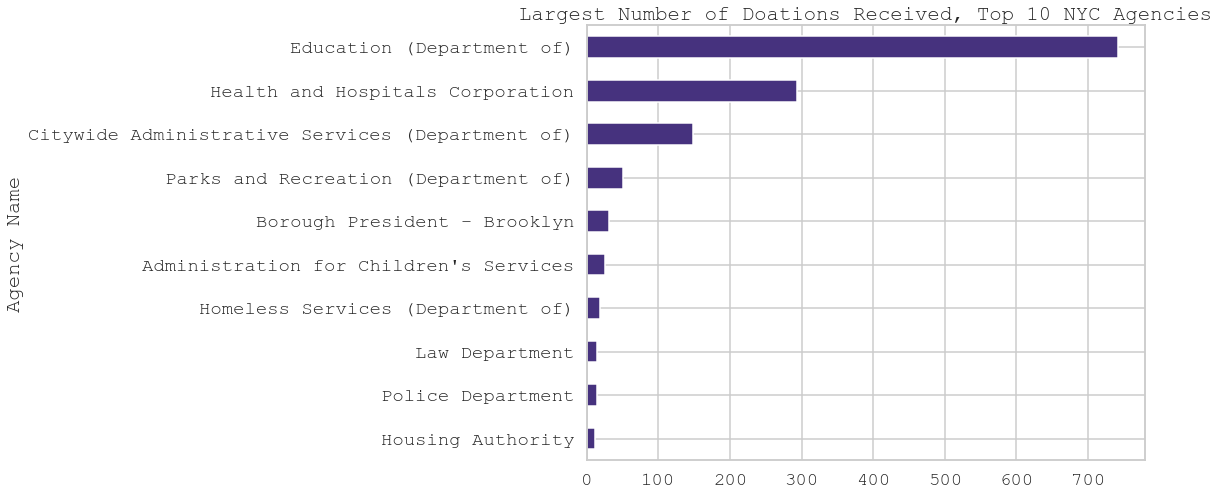

In [102]:
donations.groupby('Agency Name')['Value of Donation'].count().sort_values(ascending=False).head(10).sort_values().plot(kind='barh',
                                                                                                         figsize=(10,8),
                                                                                                         title='Largest Number of Doations Received, Top 10 NYC Agencies');

### 3.2 What is the total ***value*** (in US Dollars) of donations made to each agency? 

In [58]:
donations.groupby('Agency Name')['Value of Donation'].sum().sort_values(ascending=False)

Agency Name
Education (Department of)                                                  535,708,824.58
Health and Hospitals Corporation                                            45,532,579.68
Economic Development Corporation                                            17,562,938.00
Citywide Administrative Services (Department of)                             8,585,858.05
Police Department                                                            7,304,070.82
Parks and Recreation (Department of)                                         5,733,307.02
Fire Department                                                              4,339,833.00
Borough President - Brooklyn                                                 3,375,329.96
Administration for Children's Services                                       2,971,921.00
Housing Authority                                                            2,823,341.72
Mayor's Office                                                               2,211,370.0

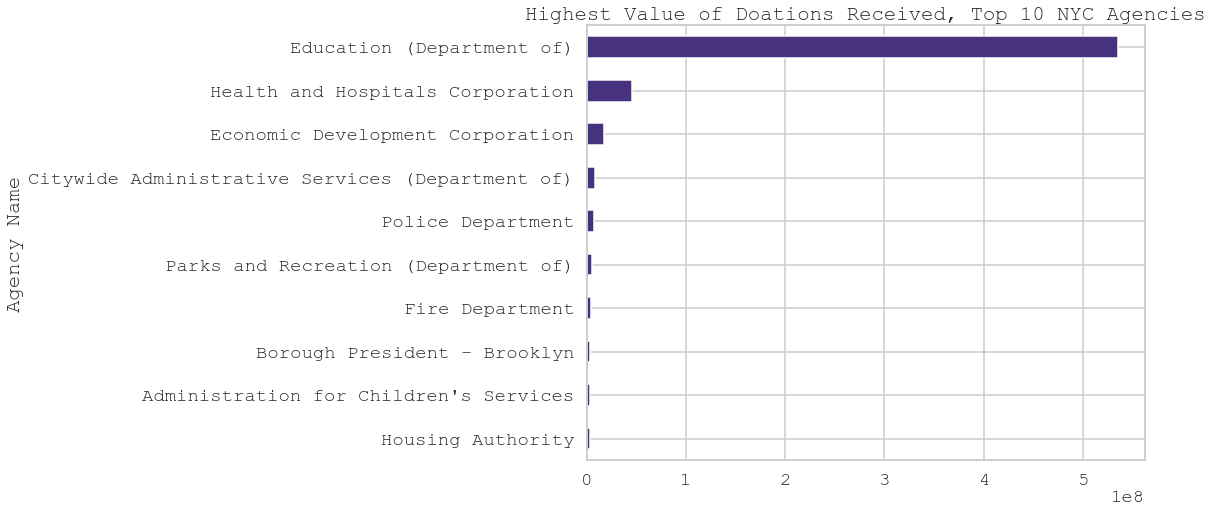

In [104]:
donations.groupby('Agency Name')['Value of Donation'].sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh',
                                                                                                         figsize=(10,8),
                                                                                                         title='Highest Value of Doations Received, Top 10 NYC Agencies');

### 3.3 What was the largest donation made?

In [92]:
max_donation = donations.loc[donations['Value of Donation'] == donations['Value of Donation'].max()]

max_donation

,Agency Name,Name of Donor (Individual or Firm),Type of Donation,Value of Donation
716,Education (Department of),NYC DOE Community Schools Grant ; STATE MISC. ...,Money,"50,771,238.00"


### 3.4 What was the smallest donation made?

In [127]:
min_donation = donations.loc[donations['Value of Donation'] == donations['Value of Donation'].min()]

min_donation

,Agency Name,Name of Donor (Individual or Firm),Type of Donation,Value of Donation
107,Citywide Administrative Services (Department of),Anesthesia Care LLC,Non-Surgical Nitrile Gloves,3.00


### 3.3 What is the distribution of different donation amounts?

In [94]:
donations['Value of Donation'].describe()

count        1,407.00
mean       456,582.44
std      2,697,038.96
min              3.00
25%         10,022.50
50%         35,804.00
75%        157,493.00
max     50,771,238.00
Name: Value of Donation, dtype: float64

### 3.4 How many donations of $100 or less were made?

In [108]:
small_dollar_donations = donations.loc[donations['Value of Donation'] <= 100]

small_dollar_donations['Value of Donation'].count()

9

In [116]:
small_dollar_donations.sort_values(by='Value of Donation', ascending=False)

,Agency Name,Name of Donor (Individual or Firm),Type of Donation,Value of Donation
201,Citywide Administrative Services (Department of),Queens College,Disinfectant Spray Bottles,96.36
175,Citywide Administrative Services (Department of),Metropolitan Art Museum,Non-Surgical Disposable Masks,82.00
151,Citywide Administrative Services (Department of),Home Depot,Heavy Duty Coverall w/hood,81.28
150,Citywide Administrative Services (Department of),Home Depot,Shoe Covers,72.00
195,Citywide Administrative Services (Department of),Peloton Interactive,Thermometer,46.14
108,Citywide Administrative Services (Department of),Anesthesia Care LLC,Tyxex Suit,10.16
200,Citywide Administrative Services (Department of),Queens College,Non-Surgical Nitrile Gloves,9.00
174,Citywide Administrative Services (Department of),Metropolitan Art Museum,Non-Surgical Utility Gloves,6.00
107,Citywide Administrative Services (Department of),Anesthesia Care LLC,Non-Surgical Nitrile Gloves,3.00


### 3.5 How many donations of $1,000,000 or more were made?

In [109]:
million_dollar_donations = donations.loc[donations['Value of Donation'] >= 1000000]

million_dollar_donations['Value of Donation'].count()

84

In [117]:
# display the top twenty $1,000,000+ donations
million_dollar_donations.sort_values(by='Value of Donation', ascending=False).head(20)

,Agency Name,Name of Donor (Individual or Firm),Type of Donation,Value of Donation
716,Education (Department of),NYC DOE Community Schools Grant ; STATE MISC. ...,Money,"50,771,238.00"
481,Education (Department of),D27-D29 Magnet Grant new U165A160013 ; MAGNET ...,Money,"45,900,000.00"
943,Education (Department of),Title I School Improvement Grant 1003(a) FY20 ...,Money,"36,450,000.00"
513,Education (Department of),Ds 46 Teaching Fellows ; SELF SUSTAINING 10 1,Money,"31,793,009.00"
464,Education (Department of),Community School Districts 21 and 22 Consortiu...,Money,"23,100,000.00"
880,Education (Department of),Teacher & School Leaders Grant ; MISC FED GRAN...,Money,"23,009,748.00"
483,Education (Department of),D30-D25 Magnet Grant U165A160045 ; MAGNET SCH ...,Money,"21,000,000.00"
263,Economic Development Corporation,Stephen A. Cohen/Alexandra Marie Cohen,Money,"17,500,000.00"
512,Education (Department of),Ds 46 Teaching Fellows ; SELF SUSTAINING 10 0,Money,"13,831,581.00"
921,Education (Department of),"Teacher and School Leader - Build, Retain and ...",Money,"12,879,722.00"


### 3.7 What were the largest donations of money made?

In [124]:
money_donations = donations.loc[donations['Type of Donation'] == 'Money']

money_donations.nlargest(5, columns='Value of Donation', keep='all')

,Agency Name,Name of Donor (Individual or Firm),Type of Donation,Value of Donation
716,Education (Department of),NYC DOE Community Schools Grant ; STATE MISC. ...,Money,"50,771,238.00"
481,Education (Department of),D27-D29 Magnet Grant new U165A160013 ; MAGNET ...,Money,"45,900,000.00"
943,Education (Department of),Title I School Improvement Grant 1003(a) FY20 ...,Money,"36,450,000.00"
513,Education (Department of),Ds 46 Teaching Fellows ; SELF SUSTAINING 10 1,Money,"31,793,009.00"
464,Education (Department of),Community School Districts 21 and 22 Consortiu...,Money,"23,100,000.00"


### 3.7 What were the largest in-kind donations made?

In [126]:
in_kind_donations = donations.loc[donations['Type of Donation'] == 'In-Kind']

in_kind_donations.nlargest(5, columns='Value of Donation')

,Agency Name,Name of Donor (Individual or Firm),Type of Donation,Value of Donation
1305,Health and Hospitals Corporation,World Center Kitchen/Bloomberg Foundation,In-Kind,"6,000,000.00"
1304,Health and Hospitals Corporation,JetBlue 5000 at $500,In-Kind,"2,500,000.00"
1303,Health and Hospitals Corporation,Girl Scouts of America,In-Kind,"2,306,336.00"
1332,Housing Authority,DCAS- Hand Sanitizer 8 oz,In-Kind,"2,256,834.72"
1302,Health and Hospitals Corporation,"Clinique Laboratories, LLC",In-Kind,"1,538,757.65"


---

---

## **Next steps**

In [131]:
# export data for data graphic creation

highest_donations = donations.groupby('Agency Name')['Value of Donation'].sum().sort_values(ascending=False).head(10)

In [130]:
highest_donations.to_csv('highest_donations.csv')

***

---